In [1]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches

In [5]:
text_images_id = []
with open('Data/image_id_for_test.txt', 'r') as text_file:
    for dd in text_file:
        text_images_id.append(dd.replace('\n',''))
text_images_id

['BloodImage_00007',
 'BloodImage_00011',
 'BloodImage_00015',
 'BloodImage_00016',
 'BloodImage_00018',
 'BloodImage_00019',
 'BloodImage_00021',
 'BloodImage_00031',
 'BloodImage_00033',
 'BloodImage_00041',
 'BloodImage_00057',
 'BloodImage_00058',
 'BloodImage_00062',
 'BloodImage_00063',
 'BloodImage_00065',
 'BloodImage_00067',
 'BloodImage_00068',
 'BloodImage_00074',
 'BloodImage_00075',
 'BloodImage_00077',
 'BloodImage_00088',
 'BloodImage_00093',
 'BloodImage_00098',
 'BloodImage_00103',
 'BloodImage_00132',
 'BloodImage_00135',
 'BloodImage_00136',
 'BloodImage_00137',
 'BloodImage_00149',
 'BloodImage_00157',
 'BloodImage_00161',
 'BloodImage_00167',
 'BloodImage_00169',
 'BloodImage_00171',
 'BloodImage_00172',
 'BloodImage_00178',
 'BloodImage_00180',
 'BloodImage_00184',
 'BloodImage_00205',
 'BloodImage_00208',
 'BloodImage_00220',
 'BloodImage_00225',
 'BloodImage_00226',
 'BloodImage_00227',
 'BloodImage_00229',
 'BloodImage_00233',
 'BloodImage_00234',
 'BloodImage_

In [8]:
%pylab inline

import os, sys, random
import xml.etree.ElementTree as ET
from glob import glob
import pandas as pd
from shutil import copyfile
import numpy as np

annotations = glob('Data/Annotations/*.xml')
print(annotations.count)
df = []
cnt = 0
cnt1 = 0
for file in annotations:
    image_id = file.split('/')[-1].split('.')[0]
    filename = 'Data/BloodImages/'+file.split('/')[-1].replace('.xml','.jpg')
    row = []
    parsedXML = ET.parse(file)
    for node in parsedXML.getroot().iter('object'):
        blood_cells = node.find('name').text
        xmin = int(node.find('bndbox/xmin').text)
        xmax = int(node.find('bndbox/xmax').text)
        ymin = int(node.find('bndbox/ymin').text)
        ymax = int(node.find('bndbox/ymax').text)
        row = [filename,xmin,ymin,xmax, ymax,blood_cells]
        if image_id not in text_images_id:
            df.append(row)
            cnt += 1
        cnt1 +=1

data = pd.DataFrame(df, columns=['image_names','xmin','ymin', 'xmax', 'ymax','cell_type'])

data.sort_values(by=['image_names'])

data.to_csv('Data/train.txt', index=None,header=None,sep=',')
data.to_csv('Data/train.csv')


#data[['image_names', 'cell_type', 'xmin', 'xmax', 'ymin', 'ymax']].to_csv('train.csv', index=False)


Populating the interactive namespace from numpy and matplotlib
<built-in method count of list object at 0x7f5f25eb7a88>


In [9]:
train = pd.read_csv('Data/train.csv')
train.head()

,Unnamed: 0,image_names,xmin,ymin,xmax,ymax,cell_type
0,0,Data/BloodImages/BloodImage_00040.jpg,242,117,457,332,WBC
1,1,Data/BloodImages/BloodImage_00040.jpg,140,308,249,415,RBC
2,2,Data/BloodImages/BloodImage_00040.jpg,96,362,205,469,RBC
3,3,Data/BloodImages/BloodImage_00040.jpg,1,323,89,430,RBC
4,4,Data/BloodImages/BloodImage_00040.jpg,79,212,212,317,RBC


In [ ]:
# Number of unique training images
train['image_names'].unique()

In [11]:
train['cell_type'].value_counts()

RBC          3350
WBC           301
Platelets     292
Name: cell_type, dtype: int64

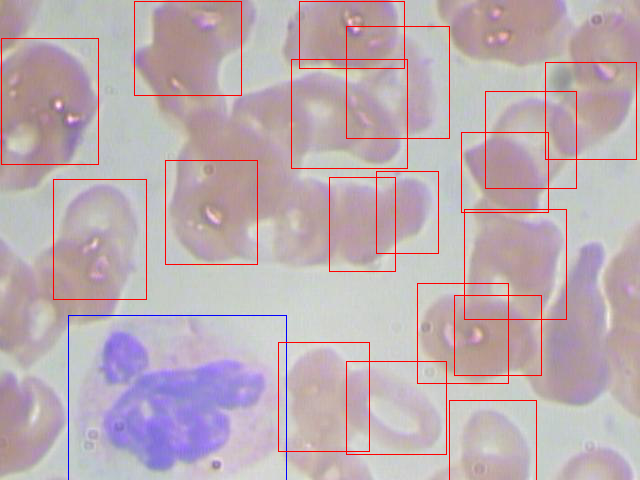

In [13]:
from PIL import Image, ImageDraw

imgpath = 'Data/BloodImages/BloodImage_00001.jpg'
im = Image.open(imgpath)
draw = ImageDraw.Draw(im)
for _,row in train[train.image_names == imgpath].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    
    # assign different color to different classes of objects
    if row.cell_type == 'RBC':
        draw.rectangle((xmin, ymin, xmax, ymax), outline='red')
    elif row.cell_type == 'WBC':
        draw.rectangle((xmin, ymin, xmax, ymax), outline='blue')
    elif row.cell_type == 'Platelets':
        draw.rectangle((xmin, ymin, xmax, ymax), outline='green')
    
im